# Prävalenz von Infektionskrankheiten im Verlauf der Zeit

Gruppenmitglieder: Dennis Bailer, Noémie Frochaux, David Brunner

Fragen:
- Wie ist die Prävalenz von verschiedenen Infektionskrankheiten?
- Warum nehmen gewisse Krankheiten zu- und ab?

Quelle: https://ourworldindata.org/grapher/the-number-of-cases-of-infectious-diseases

## 1. Daten beschaffen und laden

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Daten Infections Final.csv', skiprows=1,
                 names=['Year','Disease','Prevalence']) 
df.head()

,Year,Disease,Prevalence
0,1920,Smallpox,401318
1,1921,Smallpox,303850
2,1922,Smallpox,190159
3,1923,Smallpox,174799
4,1924,Smallpox,186354


## 2. Daten Vorbereiten

In [3]:
df_pivot = df.pivot(index='Year', columns='Disease', values='Prevalence')
df_pivot

Disease,Cholera,Guinea worm,HIV/AIDS,Malaria,Paralytic polio,Rabies,Smallpox,Tuberculosis,Yaws
Year,,,,,,,,,
1920,NaN,NaN,NaN,NaN,NaN,NaN,401318.0,NaN,NaN
1921,NaN,NaN,NaN,NaN,NaN,NaN,303850.0,NaN,NaN
1922,NaN,NaN,NaN,NaN,NaN,NaN,190159.0,NaN,NaN
1923,NaN,NaN,NaN,NaN,NaN,NaN,174799.0,NaN,NaN
1924,NaN,NaN,NaN,NaN,NaN,NaN,186354.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020,323369.0,27.0,1730000.0,244890000.0,8771.0,10352.0,NaN,8440000.0,NaN
2021,223370.0,15.0,1650000.0,249120000.0,4858.0,10181.0,NaN,8410000.0,NaN
2022,NaN,13.0,NaN,NaN,6370.0,NaN,NaN,NaN,NaN


## 3. Statistik der Rohdaten (Analyse im Long-Format)

über die einzelnen Spalten kann folgendes ausgesagt werden:

- Die Spalte Disease enthält 9 verschiedene Krankheiten
- Es sind Daten zwischen 1920 und 2024 vorhanden. Die Daten sind komplett.
- Die Prävalenz streut zwischen 2 und 257'350'000 Menschen

In [4]:
df.dtypes

Year           int64
Disease       object
Prevalence     int64
dtype: object

### Historische Trends bei Infektionskrankheiten
Hier stellen wir die Grafik von Our world in data selbst dar:

<Axes: title={'center': 'Historische Trends bei Infektionskrankheiten'}, xlabel='Jahr', ylabel='Fälle pro Jahr (logarythmiert)'>

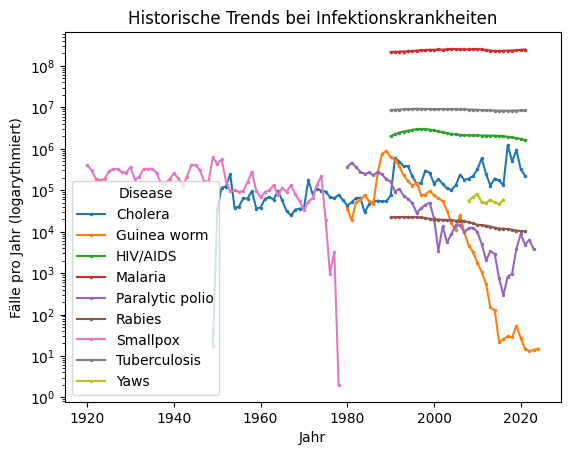

In [5]:
df_Krankheit=df_pivot[['Cholera','Guinea worm','HIV/AIDS','Malaria','Paralytic polio','Rabies','Smallpox','Tuberculosis','Yaws']]
df_Krankheit.plot(title='Historische Trends bei Infektionskrankheiten', logy=True, marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr (logarythmiert)')

### 3.1 Analyse Krankheiten

In [6]:
print("Anzahl verschiedener Infektionskrankheiten:", df["Disease"].nunique())

Anzahl verschiedener Infektionskrankheiten: 9


In [7]:
df["Disease"].value_counts()

Disease
Cholera            73
Smallpox           59
Guinea worm        45
Paralytic polio    44
Malaria            32
Tuberculosis       32
HIV/AIDS           32
Rabies             32
Yaws                9
Name: count, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Infektionskrankheit'}, xlabel='Die analysierten Krankheiten', ylabel='Anzahl Datenpunkte'>

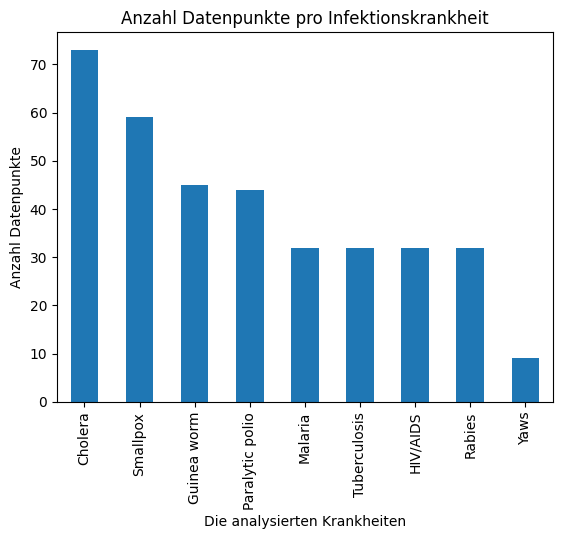

In [30]:
df['Disease'].value_counts().plot(kind='bar',
                                  xlabel='Die analysierten Krankheiten',
                                  ylabel='Anzahl Datenpunkte',
                                  title='Anzahl Datenpunkte pro Infektionskrankheit')

### 3.2 Analyse Jahr

In [9]:
print('Anzahl verschiedener Jahre: ', len(df['Year'].unique()))

Anzahl verschiedener Jahre:  105


In [10]:
df['Year'].value_counts().sort_index()
#Datenpunkte pro Jahr

Year
1920    1
1921    1
1922    1
1923    1
1924    1
       ..
2020    7
2021    7
2022    2
2023    2
2024    1
Name: count, Length: 105, dtype: int64

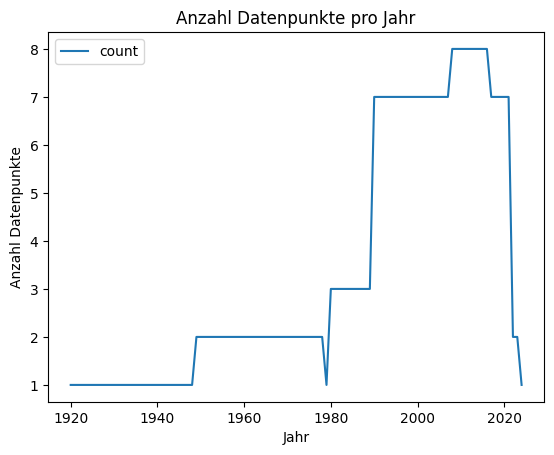

In [11]:
# Jahre mit maximaler Anzahl Datenpunkte
g = df['Year'].value_counts().sort_index().plot(
        ylabel='Anzahl Datenpunkte',
        xlabel='Jahr',
        title='Anzahl Datenpunkte pro Jahr')
g.legend()

### 3.3 Analyse Prävalenz

In [12]:
#Ganze Zahlen zeigen
pd.options.display.float_format = '{:,.0f}'.format


print(df['Prevalence'].describe())

count           358
mean     22,565,478
std      68,444,105
min               2
25%          34,289
50%         139,082
75%       2,010,000
max     257,350,000
Name: Prevalence, dtype: float64


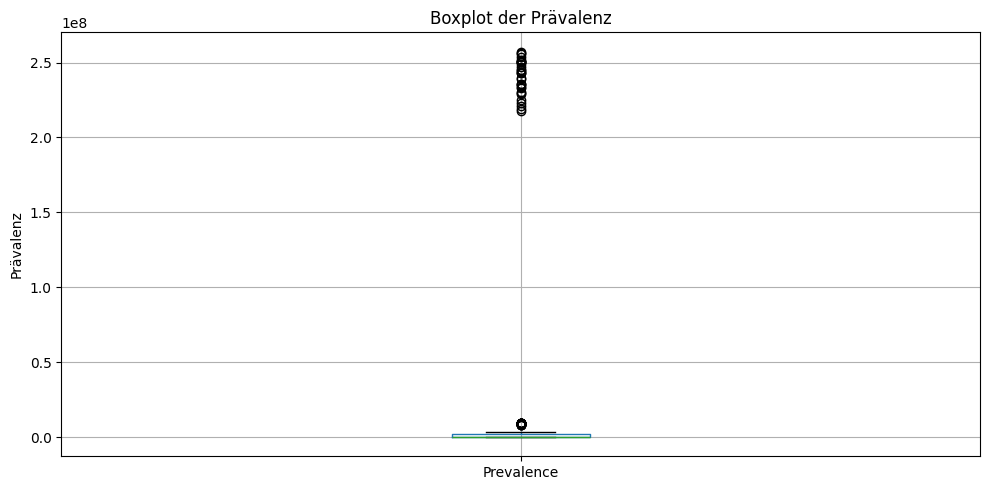

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
df.boxplot(column='Prevalence')
plt.title('Boxplot der Prävalenz')
plt.ylabel('Prävalenz')
plt.tight_layout()
plt.show()

	•	Ausreißer sofort sichtbar
	•	Median klar erkennbar
	•	Spannweite der Werte verständlich
	•	nicht verzerrt durch binning (Anzahl Klassen)

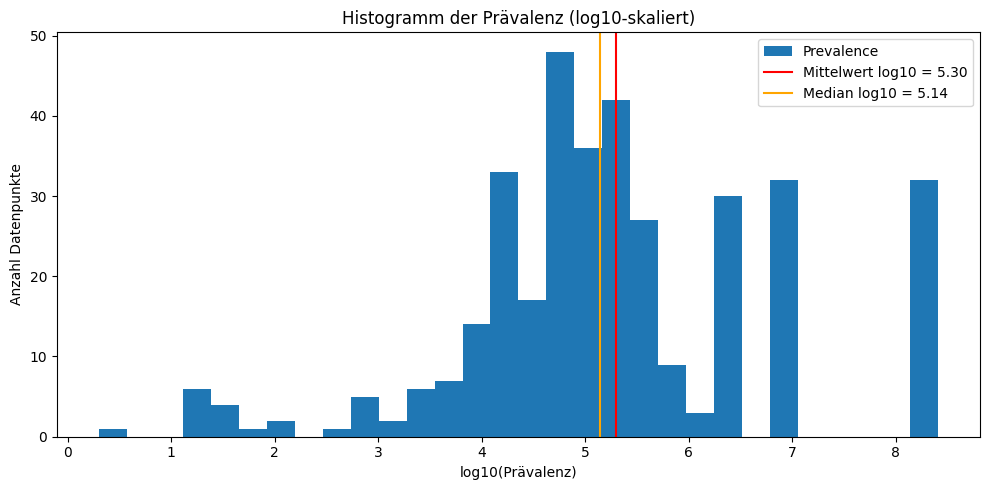

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Positive Werte auswählen (logarithmieren geht nicht für 0 oder negative Werte)
prevalence_positive = df['Prevalence'][df['Prevalence'] > 0]

# Logarithmiertes Histogramm
g2 = np.log10(prevalence_positive).plot(kind='hist', bins=30,
                                        title='Histogramm der Prävalenz (log10-skaliert)',
                                        xlabel='log10(Prävalenz)',
                                        ylabel='Anzahl Datenpunkte',
                                        figsize=(10,5))

mean_log = np.log10(prevalence_positive).mean()
g2.axvline(x=mean_log, color='red', label=f'Mittelwert log10 = {mean_log:.2f}')

median_log = np.log10(prevalence_positive).median()
g2.axvline(x=median_log, color='orange', label=f'Median log10 = {median_log:.2f}')

g2.legend()
plt.tight_layout()
plt.show()

	•	wie sich die Werte über mehrere Größenordnungen verteilen
	•	ob Gruppen sichtbar werden, die im normalen Histogramm verdeckt waren
	•	ob extreme Ausreißer die Analyse verzerren

# Schritt 4:
Cholera:

<Axes: title={'center': 'Cholera'}, xlabel='Jahr', ylabel='Fälle pro Jahr'>

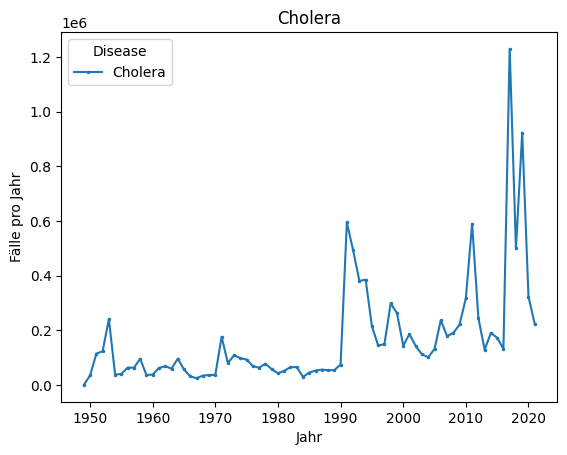

In [26]:
df_Krankheit=df_pivot[['Cholera']]
df_Krankheit.plot(title='Cholera', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=False, color='#1f77b4')

Dave

<Axes: title={'center': 'Guineawurm'}, xlabel='Jahr', ylabel='Fälle pro Jahr'>

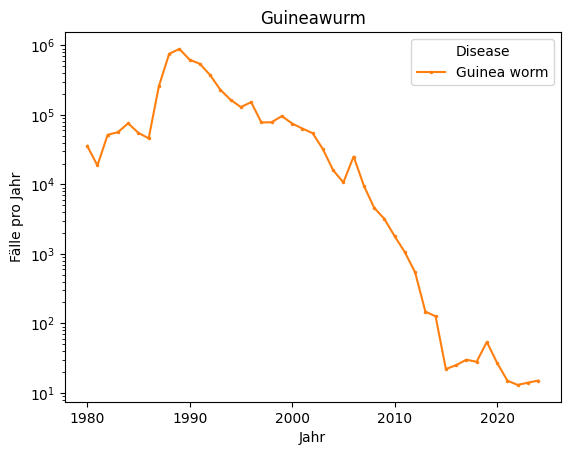

In [32]:
df_Krankheit=df_pivot[['Guinea worm']]
df_Krankheit.plot(title='Guineawurm', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=True, color='#ff7f0e')

Dennis

<Axes: title={'center': 'HIV/AIDS'}, xlabel='Jahr', ylabel='Fälle pro Jahr'>

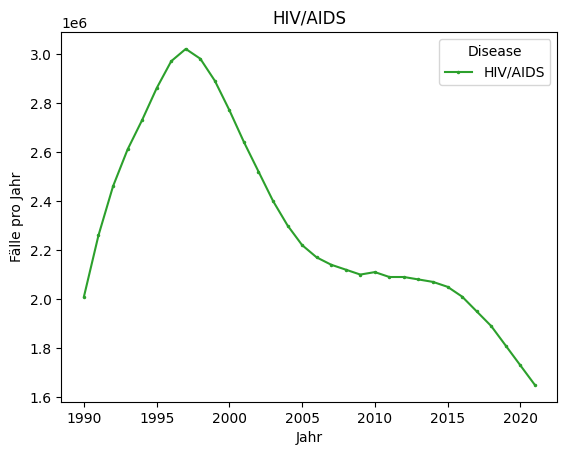

In [34]:
df_Krankheit=df_pivot[['HIV/AIDS']]
df_Krankheit.plot(title='HIV/AIDS', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=False, color='#2ca02c')

Dennis

<Axes: title={'center': 'Malaria'}, xlabel='Jahr', ylabel='Fälle pro Jahr'>

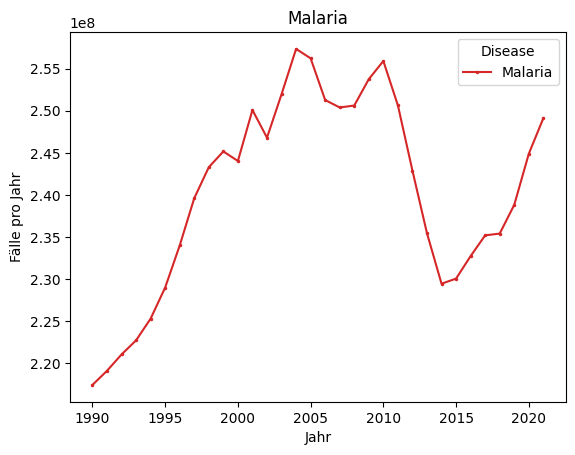

In [18]:
df_Krankheit=df_pivot[['Malaria']]
df_Krankheit.plot(title='Malaria', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=False, color='#d62728')

Dave

<Axes: title={'center': 'Polio'}, xlabel='Jahr', ylabel='Fälle pro Jahr'>

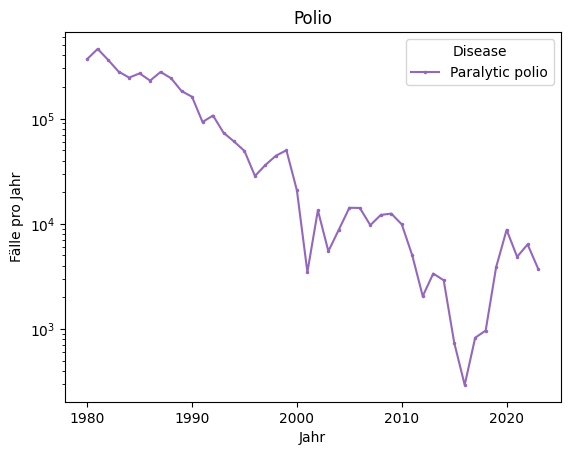

In [19]:
df_Krankheit=df_pivot[['Paralytic polio']]
df_Krankheit.plot(title='Polio', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=True, color='#9467bd')

Amie

<Axes: title={'center': 'Tollwut'}, xlabel='Jahr', ylabel='Fälle pro Jahr'>

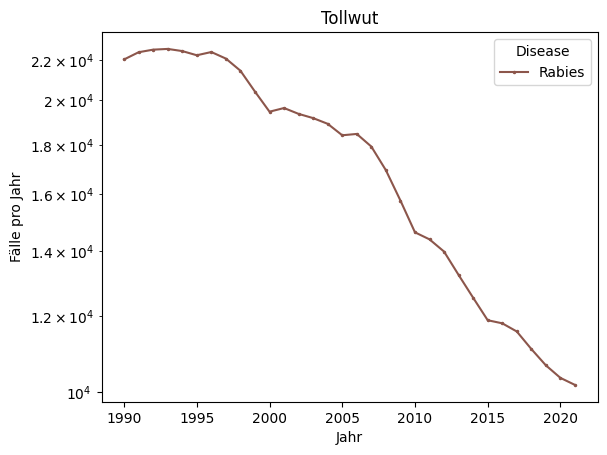

In [20]:
df_Krankheit=df_pivot[['Rabies']]
df_Krankheit.plot(title='Tollwut', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=True, color='#8c564b')

Amie

<Axes: title={'center': 'Pocken'}, xlabel='Jahr', ylabel='Fälle pro Jahr'>

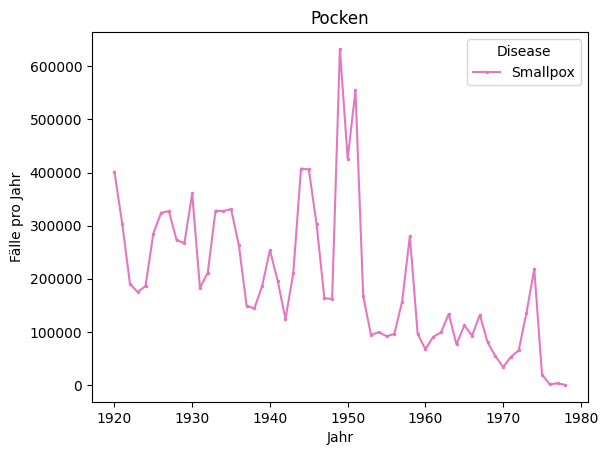

In [35]:
df_Krankheit=df_pivot[['Smallpox']]
df_Krankheit.plot(title='Pocken', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=False, color='#e377c2')

Dennis

<Axes: title={'center': 'Tuberkulose'}, xlabel='Jahr', ylabel='Fälle pro Jahr'>

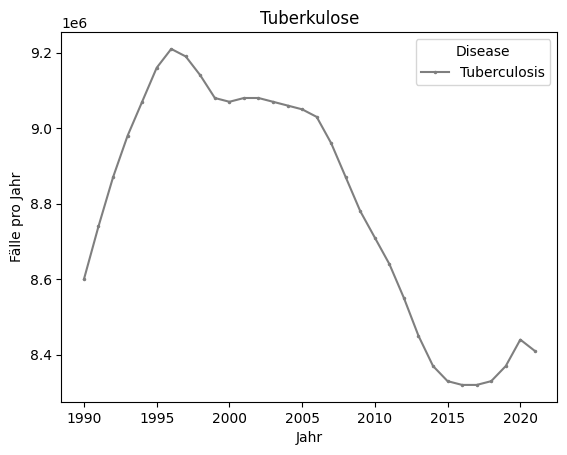

In [22]:
df_Krankheit=df_pivot[['Tuberculosis']]
df_Krankheit.plot(title='Tuberkulose', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=False, color='#7f7f7f')

Amie

<Axes: title={'center': 'Frambösie'}, xlabel='Jahr', ylabel='Fälle pro Jahr'>

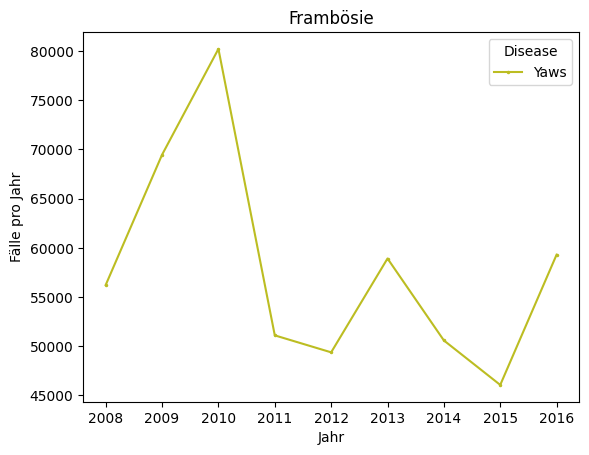

In [23]:
df_Krankheit=df_pivot[['Yaws']]
df_Krankheit.plot(title='Frambösie', marker='o', markersize=1.5, xlabel='Jahr', ylabel='Fälle pro Jahr', logy=False, color='#bcbd22')

Dave

 # Tod do:
- alle schreiben über ihre Krankheiten
- Vergleich Tuberkulose, HIV, Malaria plus Fragestellungen dazu.
- Eventuell weitere Fragestellungen.